In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('house_price_regression_dataset.csv')

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

In [ ]:
light_colors = [
   "lightblue",
   "lightgreen",
   "lightsalmon",
   "lightcoral",
   "lightpink",
   "lightyellow",
   "lightcyan",
   "lavender",
   "mistyrose",
   "lemonchiffon",
   "aliceblue",
   "mintcream",
   "ghostwhite",
   "floralwhite",
   "palegoldenrod",
   "paleturquoise",
   "palegreen",
   "palevioletred",
   "thistle",
   "powderblue",
   "beige"
]

#### Colormaps

In [ ]:
# Perceptually Uniform Sequential (Best for Continuous Data)
perceptually_uniform = ['viridis', 'plasma', 'inferno', 'magma', 'cividis']

# Sequential (Light to Dark Gradients)
sequential = ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
              'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
              'GnBu', 'PuBu', 'YlGn', 'PuBuGn', 'BuGn', 'YlGnBu']

# Diverging (Good for Positive & Negative Differences)
diverging = ['PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
             'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']

# Qualitative (For Categorical Data)
qualitative = ['Pastel1', 'Pastel2', 'Paired', 'Accent',
               'Dark2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c']

# Miscellaneous (Specialty Colormaps)
miscellaneous = ['flag', 'prism', 'ocean', 'gist_earth', 'terrain',
                 'gist_stern', 'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix',
                 'brg', 'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar']


In [ ]:
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.60,0,5,"262,382.85"
1,4272,3,3,2016,4.75,1,6,"985,260.85"
2,3592,1,2,2016,3.63,0,9,"777,977.39"
3,966,1,2,1977,2.73,1,8,"229,698.92"
4,4926,2,1,1993,4.70,0,8,"1,041,740.86"


# Relation of Target column with every other column

### 1. Target with Square Footage


<Axes: xlabel='Square_Footage', ylabel='House_Price'>

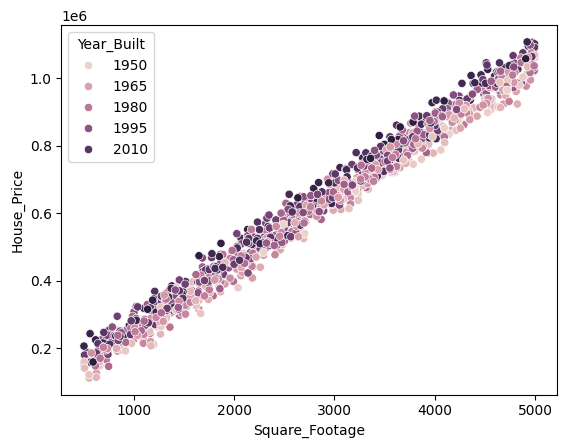

In [ ]:
sns.scatterplot(data = df, x = 'Square_Footage', y = 'House_Price', color = 'pink', hue = 'Year_Built')

##### Observations:
  - Square Footage is perfectly correlated to the Price of the house.

## Defining common ANOVA function

In [ ]:
from scipy.stats import f_oneway

def onewayanova(df, grouping_column, target_column):
  groups = df.groupby(grouping_column)[target_column]

  res = []

  for group_name, group in groups:
    res.append(group)

  statistic, p_value = f_oneway(*res)

  if p_value < 0.05:
    print(f'The Column {grouping_column} has significant effect on the price column')
  else:
    print(f'Never mind about {grouping_column} column')

### 2. Num Bedrooms and Target column

In [ ]:
onewayanova(df, 'Num_Bedrooms', 'House_Price')

Never mind about Num_Bedrooms column


<Axes: xlabel='Num_Bedrooms', ylabel='House_Price'>

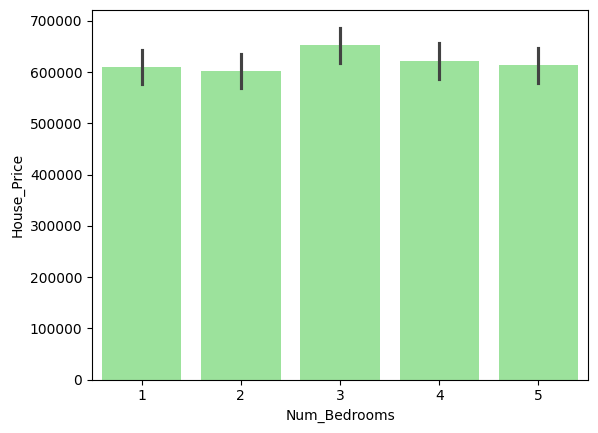

In [ ]:
sns.barplot(data = df, x = 'Num_Bedrooms', y = 'House_Price', estimator = 'mean', color = 'lightgreen')

<Axes: xlabel='Num_Bedrooms', ylabel='House_Price'>

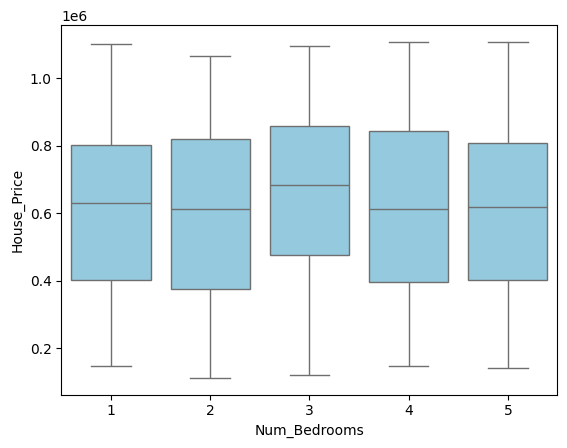

In [ ]:
sns.boxplot(data = df, x = 'Num_Bedrooms', y = 'House_Price', color = 'skyblue')

##### Observations
  - The House price is very similar to all the types of bedrooms.
  - House with 1 bedroom == House with 5 bedrooms.
  - This column doesn't have the variance to predict the output.
  - The houses with 3 bedrooms are costlier than the other.

### 3. Num_Bathroom and Price

In [ ]:
onewayanova(df, 'Num_Bathrooms', 'House_Price')

Never mind about Num_Bathrooms column


<Axes: xlabel='Num_Bathrooms', ylabel='House_Price'>

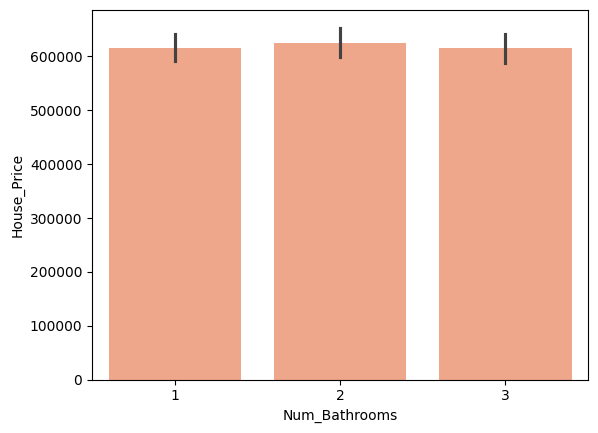

In [ ]:
sns.barplot(data = df, x = 'Num_Bathrooms', y = 'House_Price', color = 'lightsalmon')

<Axes: xlabel='Num_Bathrooms', ylabel='House_Price'>

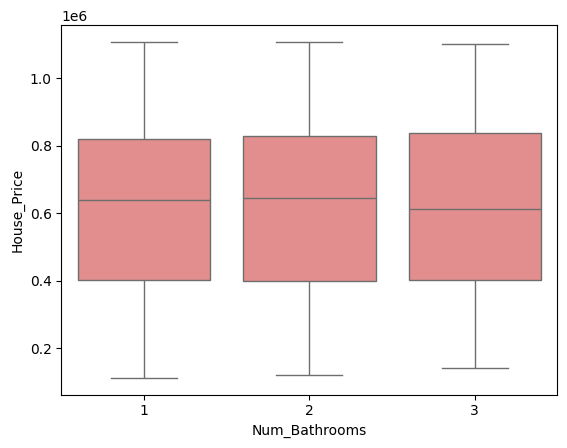

In [ ]:
sns.boxplot(data = df, x = 'Num_Bathrooms', y = 'House_Price', color = 'lightcoral')

##### Observations:
  - The distribution of data looks completely same regardless of the number of bathrooms.
  - So, this feature might not be a good predictor of the price.

### Year Built vs House Price

In [ ]:
onewayanova(df, 'Year_Built', 'House_Price')

Never mind about Year_Built column


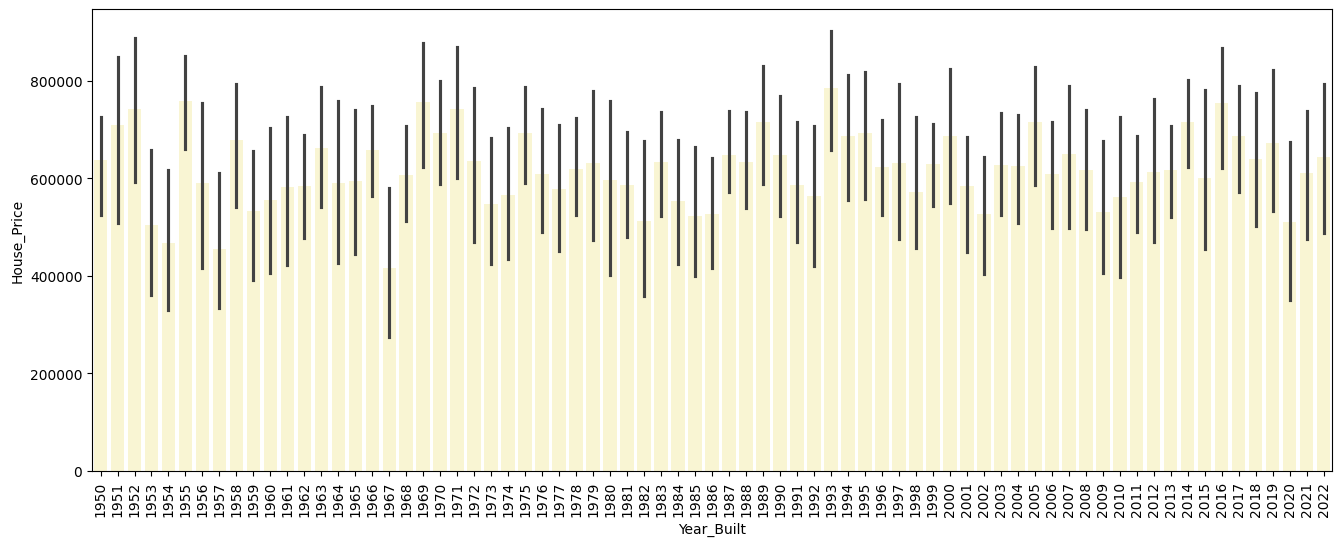

In [ ]:
plt.figure(figsize = (16, 6))
sns.barplot(data = df, x = 'Year_Built', y = 'House_Price', estimator = 'mean', color = 'lemonchiffon')
plt.xticks(rotation = 90)
plt.show()

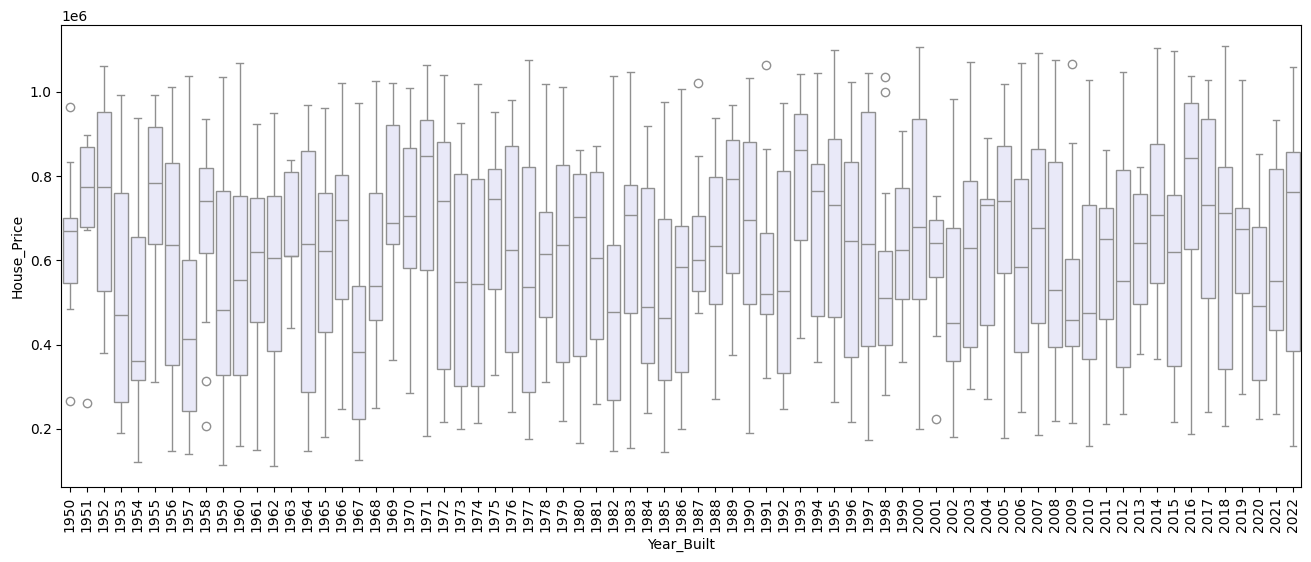

In [ ]:
plt.figure(figsize = (16, 6))
sns.boxplot(data = df, x = 'Year_Built', y = 'House_Price', color = 'Lavender')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
def transform_year(year):
  if year >= 1950 and year < 1970:
    return 'Before 1970'
  elif year >= 1970 and year < 2000:
    return 'Before 2000'
  elif year >= 2000:
    return 'After 2000'
  else:
    return 'Others'

df['year_ranges'] = df['Year_Built'].apply(transform_year)

### Lot_Size Vs House Price

<Axes: xlabel='Lot_Size', ylabel='House_Price'>

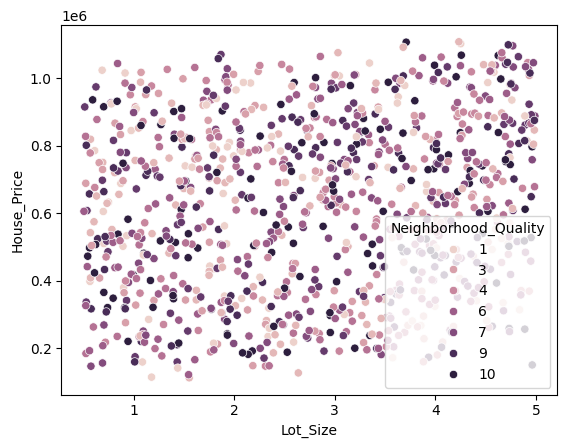

In [ ]:
sns.scatterplot(data = df, x = 'Lot_Size', y = 'House_Price', color = 'thistle', hue = 'Neighborhood_Quality')

### Observations

  - There isn't any correlation between the Lot size and the House Price.
  - The price of house when has less lot is the same as price of house which has lot size as high

### Garage_Size vs House Price

In [ ]:
onewayanova(df, 'Garage_Size', 'House_Price')

Never mind about Garage_Size column


<Axes: xlabel='Garage_Size', ylabel='House_Price'>

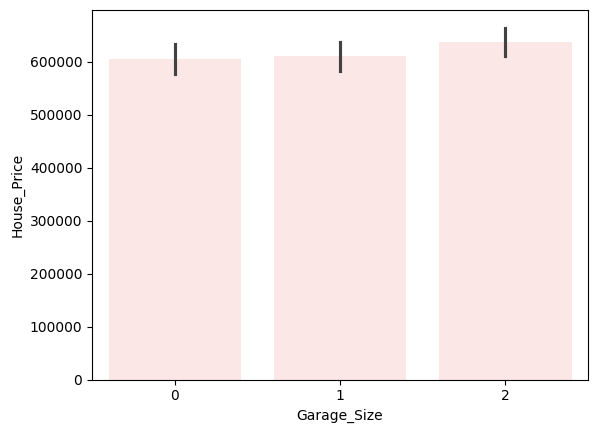

In [ ]:
sns.barplot(data = df, x = 'Garage_Size', y = 'House_Price', color = 'mistyrose')

<Axes: xlabel='Garage_Size', ylabel='House_Price'>

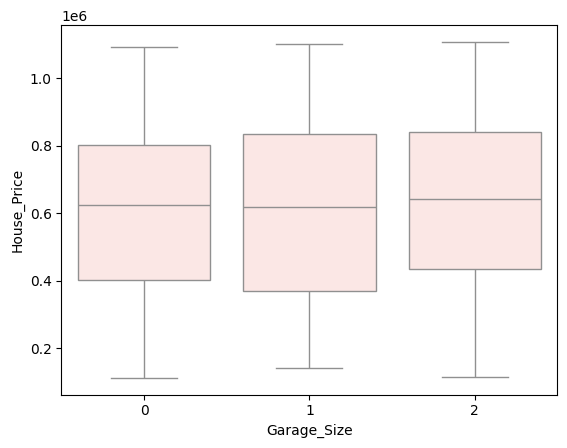

In [ ]:
sns.boxplot(data = df, x = 'Garage_Size', y = 'House_Price', color = 'mistyrose')

##### Observations
  - The distributions look pretty similar.
  - The Houses which have 2 garages are a bit high priced than houses with less garages.
  

### Neighborhood_Quality vs House Price

In [ ]:
onewayanova(df, 'Neighborhood_Quality', 'House_Price')

Never mind about Neighborhood_Quality column


<Axes: xlabel='Neighborhood_Quality', ylabel='House_Price'>

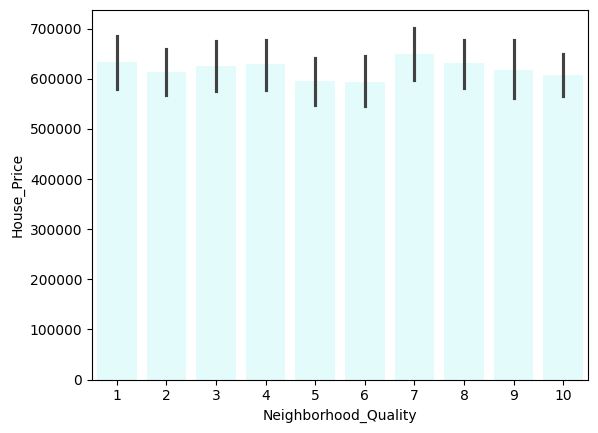

In [ ]:
sns.barplot(data = df, x = 'Neighborhood_Quality', y = 'House_Price', color = 'lightcyan')

<Axes: xlabel='Neighborhood_Quality', ylabel='House_Price'>

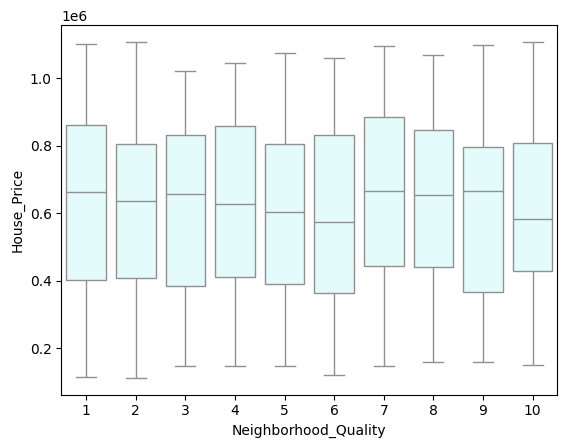

In [ ]:
sns.boxplot(data = df, x = 'Neighborhood_Quality', y = 'House_Price', color = 'lightcyan')

##### Observations
  - There is no clear relationship between neighborhood quality and the house price.

# Understanding the Correlations between the columns

### Square Footage and Lot size

<Axes: xlabel='Square_Footage', ylabel='Lot_Size'>

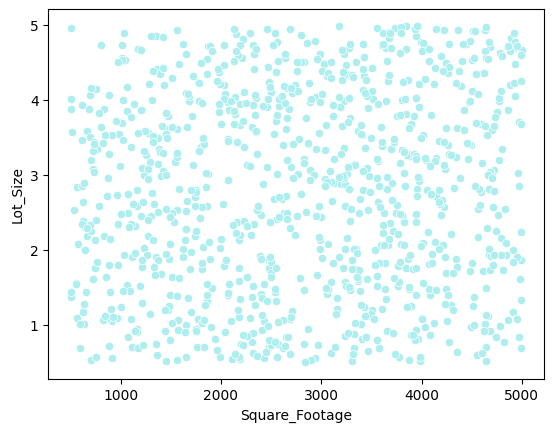

In [ ]:
sns.scatterplot(data = df, x = df['Square_Footage'], y = df['Lot_Size'], color = 'paleturquoise')

##### Observations:
  - There is no relationship between Lot size and Square footage but in general there should have been.

<Axes: xlabel='Square_Footage', ylabel='House_Price'>

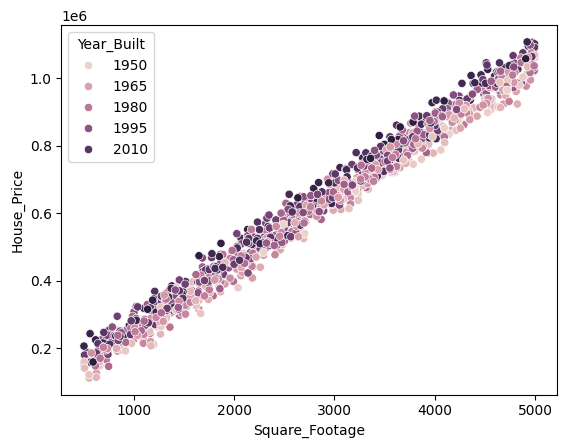

In [ ]:
sns.scatterplot(data = df, x = 'Square_Footage', y = 'House_Price', color = 'pink', hue = 'Year_Built')

##### Observations:
  - The houses which are built recently are costlier than houses built before.

### Square Footage and Num_Bedrooms

<Axes: xlabel='Num_Bedrooms', ylabel='Square_Footage'>

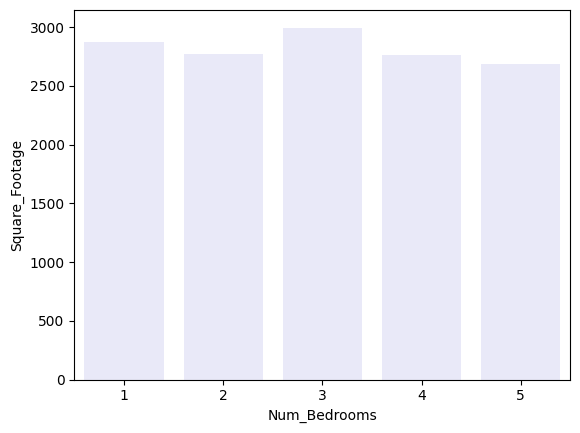

In [ ]:
sns.barplot(df.groupby('Num_Bedrooms')['Square_Footage'].mean(), color = 'lavender')

### Square Footage and Num_Bathrooms

<Axes: xlabel='Num_Bathrooms', ylabel='Square_Footage'>

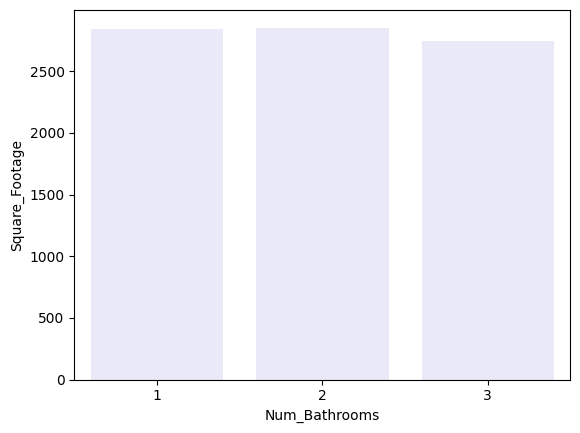

In [ ]:
sns.barplot(df.groupby('Num_Bathrooms')['Square_Footage'].mean(), color = 'lavender')

#### Observations:
  - The Square Footage column is not varying with Number of bedrooms and Number of Bathrooms.
  - This means, the number of bedrooms column doesn't have any relation with square footage.

### Year_Built vs Number of Bedrooms and Bathrooms

<Axes: xlabel='Year_Built'>

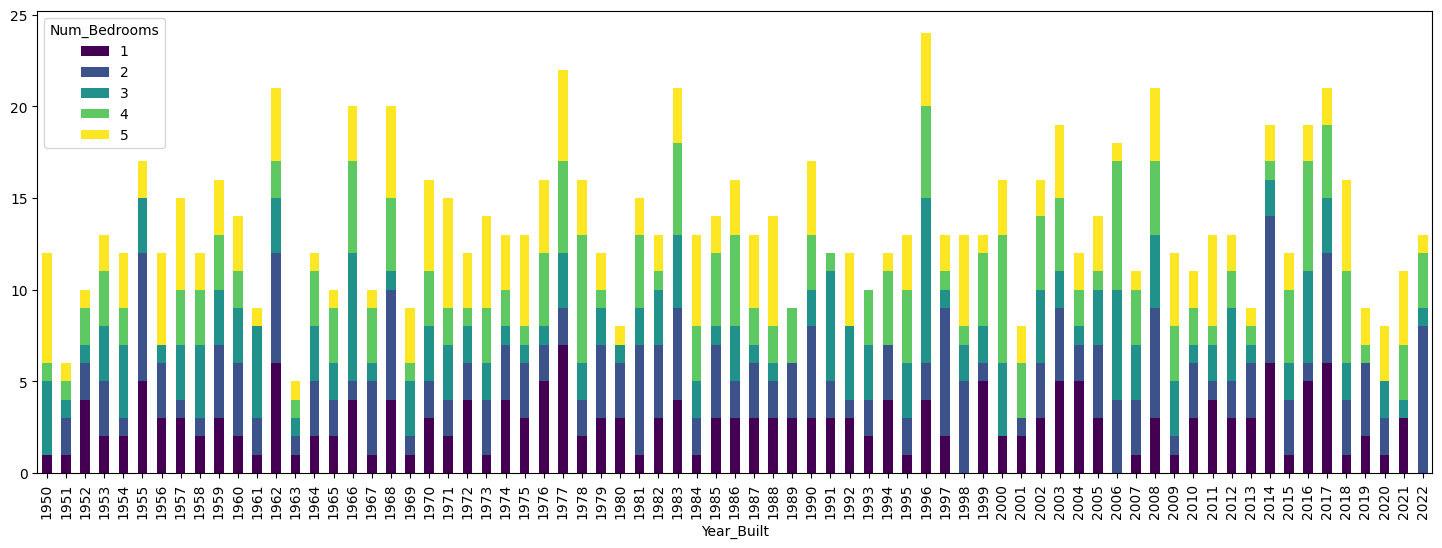

In [ ]:
crosstab = pd.crosstab(df['Year_Built'], df['Num_Bedrooms'])

crosstab.plot(kind = 'bar',stacked = True, figsize = (18,6), cmap='viridis')

<Axes: xlabel='Year_Built'>

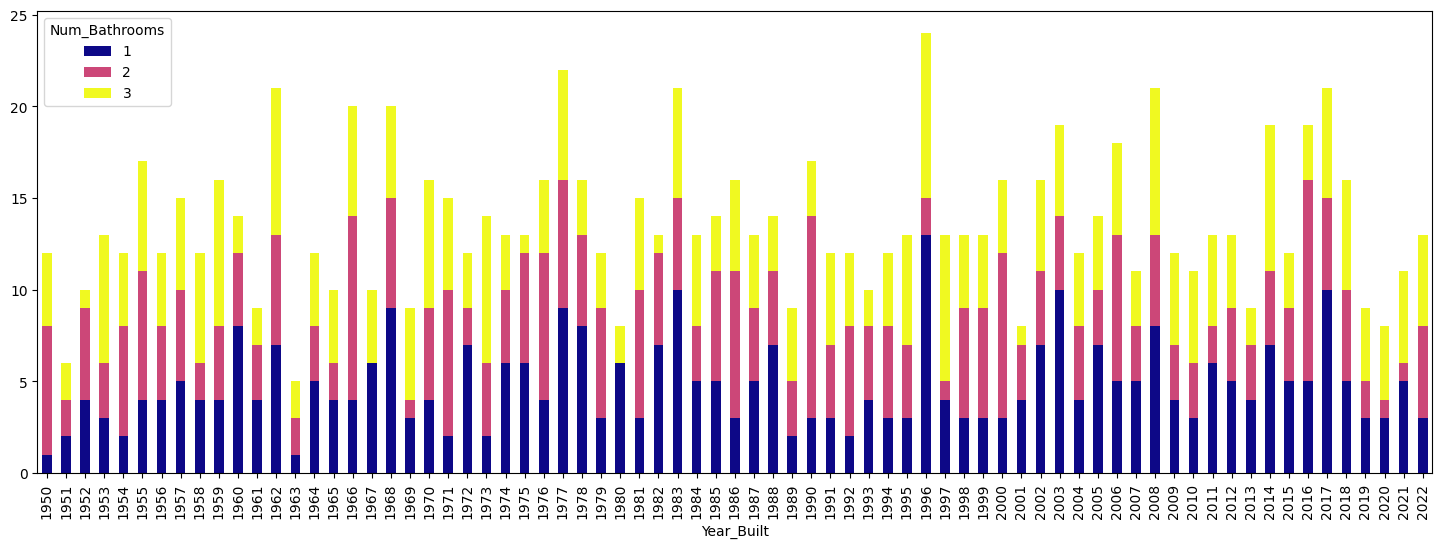

In [ ]:
crosstab = pd.crosstab(df['Year_Built'], df['Num_Bathrooms'])
crosstab.plot(kind = 'bar', stacked = True, cmap = 'plasma', figsize = (18, 6))

# Observations:
  - The number of bedrooms and bathrooms built are typically the same over the years

<Axes: xlabel='Square_Footage', ylabel='House_Price'>

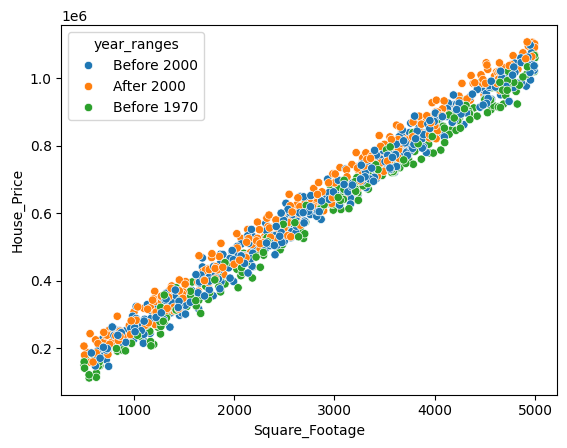

In [ ]:
sns.scatterplot(data = df, x = 'Square_Footage', y = 'House_Price', color = 'pink', hue = 'year_ranges')

#### Observations:
  - We can clearly see that the houses built after 2000 have higher price than the house built before 2000 and before 1970.
  - Houses built before 1970 < 2000 < Recent years.